# League of Legends Worlds 2024 - Swiss Stage Stats

## Introduction

In this analysis, I seek to find insights into League of Legends Champions (A playable character you can play as) 

* Corellation between champions being banned and if not banned, then picked
* Do these frequently picked/banned champions more likely to win the game
* Do these frequently picked/banned champions more likely to have an advantage against the enemy during the game (talk about Avg BT, CSM, )

## File Information

### The dataset is stored in a CSV file named champions.csv and contains the following columns:

* **Champion**: The name of the champion in the Swiss Stage.
* **Picks**: The number of times each champion was picked during the Swiss Stage matches.
* **Bans**: The number of times each champion was banned, indicating their perceived threat level.
* **Presence**: The percentage of matches where the champion was either picked or banned.
* **Wins**: The total number of games the champion won.
* **Losses**: The total number of games the champion lost.
* **Winrate**: The win percentage calculated from the champion's games.
* **KDA (Kills/Deaths/Assists)**: A performance metric representing how effectively the champion contributes to team fights.
* **Avg BT** (Average Build Time): The average time required for the champion to complete their item build.
* **GT (Game Time)**: The length of time the champion was involved in matches, reported in HH:MM:SS format.
* **CSM (Creep Score per Minute)**: Average number of minions killed per minute, reflecting farming efficiency.
* **DPM (Damage per Minute)**: Average damage dealt by the champion per minute.
* **GPM (Gold per Minute)**: Gold earned by the champion per minute.
* **CSD@15 (Creep Score Difference at 15 minutes)**: Difference in creep score compared to the opposing player by the 15-minute mark.
* **GD@15 (Gold Difference at 15 minutes)**: The difference in gold between the champion and their opponent at the 15-minute mark.
* **XPD@15 (Experience Difference at 15 minutes)**: The experience point difference between the champion and their opponent at the 15-minute mark.

In [397]:
import numpy as np
import pandas as pd
import mlcroissant as mlc
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt

In [398]:
# Download latest version
path = kagglehub.dataset_download(handle="anmatngu/league-of-legends-worlds-2024-swiss-stage-stats")
csv_file_name='champions.csv'

print("Path to dataset files:", path)

Path to dataset files: /Users/jeromedelosreyes/.cache/kagglehub/datasets/anmatngu/league-of-legends-worlds-2024-swiss-stage-stats/versions/2


In [399]:
df=pd.read_csv(filepath_or_buffer=path + "/" + csv_file_name)
df

,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg BT,GT,CSM,DPM,GPM,CSD@15,GD@15,XPD@15
0,Aurora,14,60,96%,9.0,5.0,64%,5.6,3.5,33:36:00,7.6,684.0,394.0,-2.6,-7.0,-94.0
1,Yone,28,45,95%,18.0,10.0,64%,4.3,3.4,32:14:00,9.5,645.0,442.0,5.4,303.0,265.0
2,Skarner,32,35,87%,23.0,9.0,72%,5.7,3.9,32:02:00,5.9,346.0,338.0,-0.8,11.0,82.0
3,Jax,35,28,82%,19.0,16.0,54%,3,5.2,34:25:00,8.0,440.0,402.0,-5.1,38.0,-164.0
4,Ashe,18,43,79%,13.0,5.0,72%,6.2,6.1,33:30:00,9.5,553.0,444.0,-2.8,-156.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Belveth,0,0,0%,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,Nilah,0,0,0%,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,Milio,0,0,0%,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Naafiri,0,0,0%,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [400]:
df.dtypes

Champion     object
Picks         int64
Bans          int64
Presence     object
Wins        float64
Losses      float64
Winrate      object
KDA          object
Avg BT       object
GT           object
CSM         float64
DPM         float64
GPM         float64
CSD@15      float64
GD@15       float64
XPD@15      float64
dtype: object

In [401]:
# cleaning data, removing champions that are not picked or banned in Worlds 2024
# list-wise
df=df.dropna(axis=0)
df

,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg BT,GT,CSM,DPM,GPM,CSD@15,GD@15,XPD@15
0,Aurora,14,60,96%,9.0,5.0,64%,5.6,3.5,33:36:00,7.6,684.0,394.0,-2.6,-7.0,-94.0
1,Yone,28,45,95%,18.0,10.0,64%,4.3,3.4,32:14:00,9.5,645.0,442.0,5.4,303.0,265.0
2,Skarner,32,35,87%,23.0,9.0,72%,5.7,3.9,32:02:00,5.9,346.0,338.0,-0.8,11.0,82.0
3,Jax,35,28,82%,19.0,16.0,54%,3,5.2,34:25:00,8.0,440.0,402.0,-5.1,38.0,-164.0
4,Ashe,18,43,79%,13.0,5.0,72%,6.2,6.1,33:30:00,9.5,553.0,444.0,-2.8,-156.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Kled,1,0,1%,0.0,1.0,0%,1,-,29:06:00,8.5,430.0,344.0,-7.0,-995.0,1.0
85,Senna,1,0,1%,0.0,1.0,0%,4,-,32:35:00,1.5,356.0,287.0,12.0,125.0,1067.0
86,Sett,1,0,1%,0.0,1.0,0%,0.7,-,30:12:00,8.7,330.0,361.0,-12.0,-191.0,616.0
87,Lillia,1,0,1%,0.0,1.0,0%,4,-,45:40:00,6.7,386.0,347.0,-7.0,-865.0,-495.0


In [ ]:
# converting 'object' dtype to 'int' or 'float' to easier to work with
df['Presence']=df['Presence'].str.replace('%','').astype(int)
df['Winrate']=df['Winrate'].str.replace('%','').astype(int)
df['KDA']=df['KDA'].str.replace('-','0').astype(float)
df['Avg BT']=df['Avg BT'].str.replace('-','0').astype(float)
df.dtypes

/var/folders/l2/hx7s05w129qg9xcrwbf05sz80000gn/T/ipykernel_19534/3350853062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Presence']=df['Presence'].str.replace('%','').astype(int)
/var/folders/l2/hx7s05w129qg9xcrwbf05sz80000gn/T/ipykernel_19534/3350853062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Winrate']=df['Winrate'].str.replace('%','').astype(int)
/var/folders/l2/hx7s05w129qg9xcrwbf05sz80000gn/T/ipykernel_19534/3350853062.py:4: SettingWithCopyWarning: 
A value is trying to be set

Champion     object
Picks         int64
Bans          int64
Presence      int64
Wins        float64
Losses      float64
Winrate       int64
KDA         float64
Avg BT      float64
GT           object
CSM         float64
DPM         float64
GPM         float64
CSD@15      float64
GD@15       float64
XPD@15      float64
dtype: object

In [ ]:
df

,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg BT,GT,CSM,DPM,GPM,CSD@15,GD@15,XPD@15
0,Aurora,14,60,96,9.0,5.0,64,5.6,3.5,33:36:00,7.6,684.0,394.0,-2.6,-7.0,-94.0
1,Yone,28,45,95,18.0,10.0,64,4.3,3.4,32:14:00,9.5,645.0,442.0,5.4,303.0,265.0
2,Skarner,32,35,87,23.0,9.0,72,5.7,3.9,32:02:00,5.9,346.0,338.0,-0.8,11.0,82.0
3,Jax,35,28,82,19.0,16.0,54,3.0,5.2,34:25:00,8.0,440.0,402.0,-5.1,38.0,-164.0
4,Ashe,18,43,79,13.0,5.0,72,6.2,6.1,33:30:00,9.5,553.0,444.0,-2.8,-156.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Kled,1,0,1,0.0,1.0,0,1.0,0.0,29:06:00,8.5,430.0,344.0,-7.0,-995.0,1.0
85,Senna,1,0,1,0.0,1.0,0,4.0,0.0,32:35:00,1.5,356.0,287.0,12.0,125.0,1067.0
86,Sett,1,0,1,0.0,1.0,0,0.7,0.0,30:12:00,8.7,330.0,361.0,-12.0,-191.0,616.0
87,Lillia,1,0,1,0.0,1.0,0,4.0,0.0,45:40:00,6.7,386.0,347.0,-7.0,-865.0,-495.0


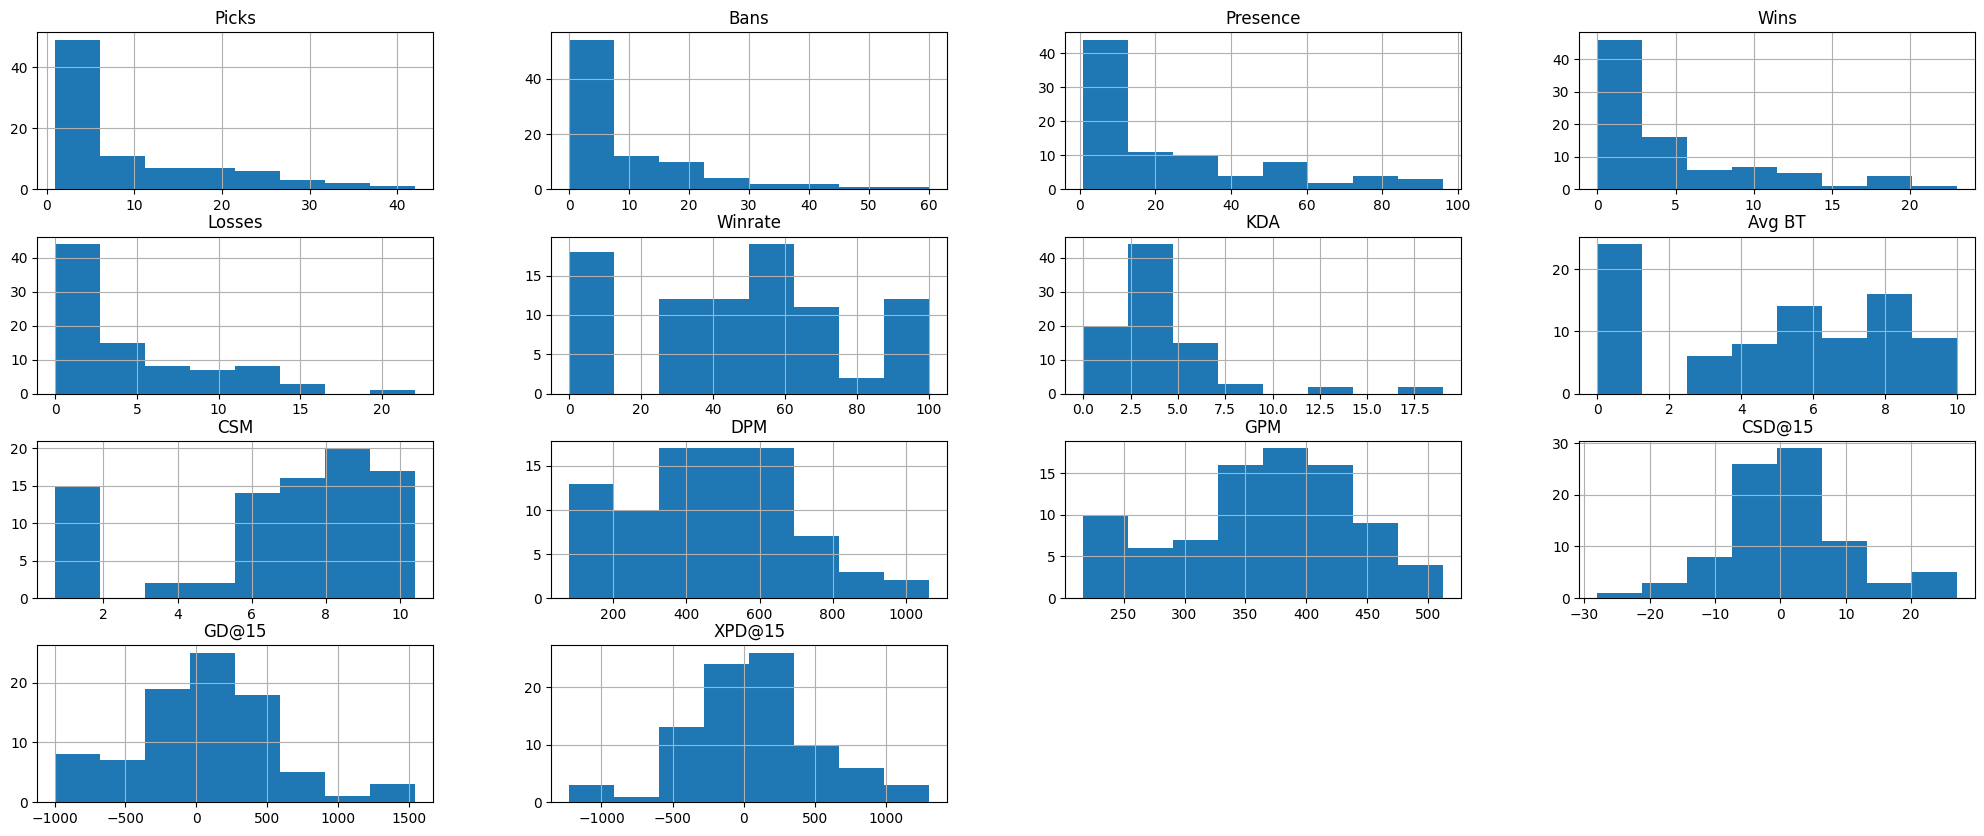

In [ ]:
# TODO: Remove later
# h=df.hist(bins=8,figsize=(15,5),grid=True,column=['Picks','Bans','Wins','GPM'])
h=df.hist(bins=8,figsize=(25,10),grid=True)

## Relationship between Champions' Presence Rate and Win Rate

54.4%
44.44%


<BarContainer object of 2 artists>

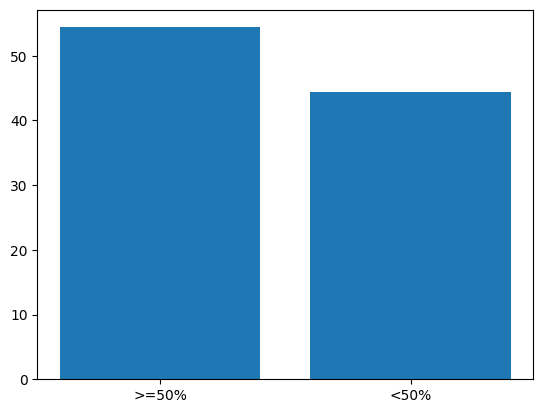

In [414]:
print(f"{round(df[df['Presence']>=50]['Winrate'].mean(),2)}%")
print(f"{round(df[df['Presence']<50]['Winrate'].mean(),2)}%")

data=[round(df[df['Presence']>=50]['Winrate'].mean(),2),round(df[df['Presence']<50]['Winrate'].mean(),2)]
plt.bar(x=['>=50%','<50%'],height=data,label='Presence Rate')

We see that

* Champions that are more likely to be picked or banned have a higher win rate with 54.4%

**Therefore, champions that are often picked or banned are most likely to win games**

## Early Game Performance and Match Outcome

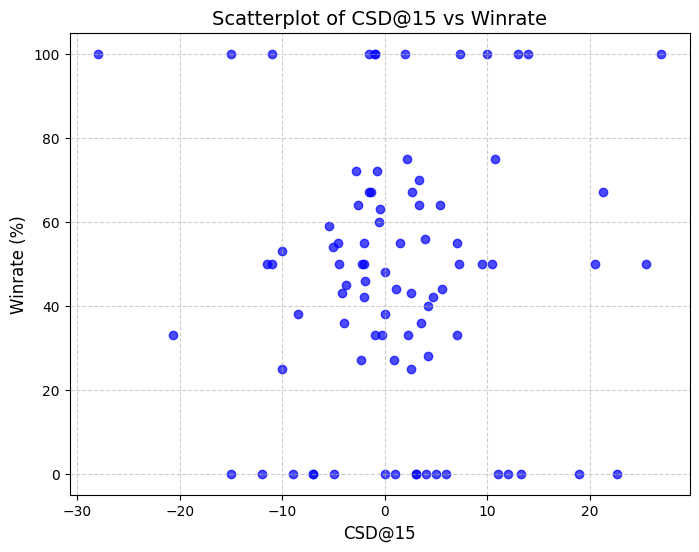

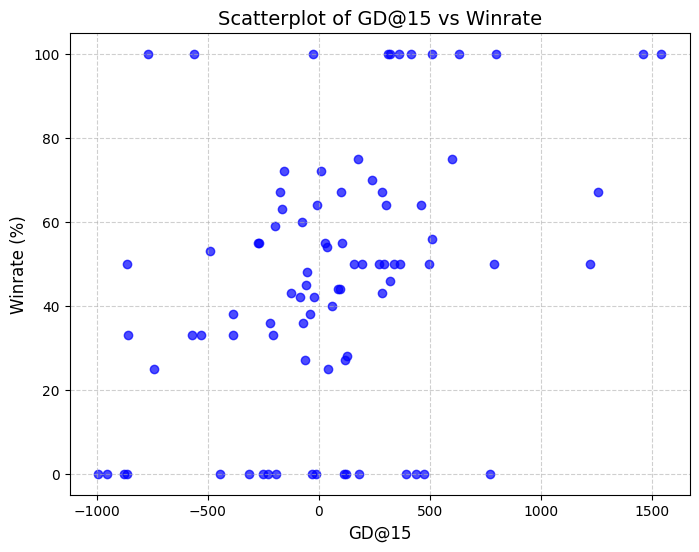

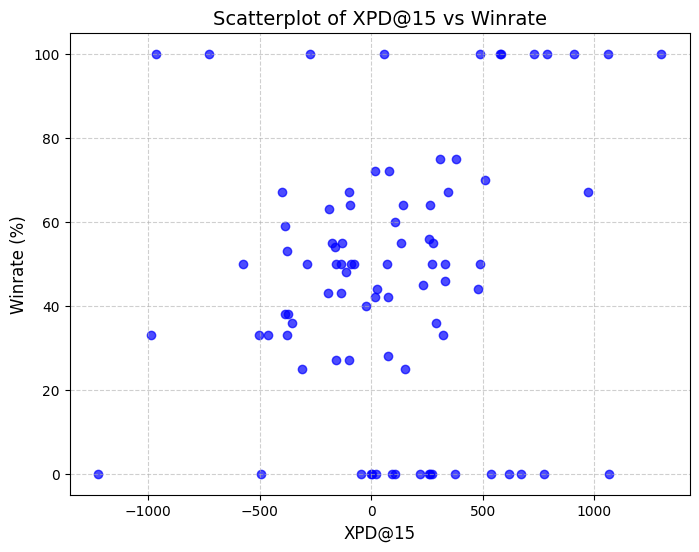

In [421]:
data = ["CSD@15", "GD@15", "XPD@15"]

for stat in data:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[stat], df["Winrate"], color='blue', alpha=0.7)
    plt.title(f'Scatterplot of {stat} vs Winrate', fontsize=14)
    plt.xlabel(stat, fontsize=12)
    plt.ylabel("Winrate (%)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()